<a href="https://colab.research.google.com/github/JihoonPark99/Computer_Vision_Study/blob/main/CV_seminar_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로를 앞으로 진행할 프로젝트 디렉토리로 이동한다.
## cd 뒤에 오는 경로로 디렉토리를 옯김.
## 코랩은 리눅스 환경이라 이런걸 쓸 수 있다. 
%cd /content/drive/MyDrive/CV_seminar_project 



/content/drive/MyDrive/CV_seminar_project


In [ ]:
pwd

'/content/drive/MyDrive/CV_seminar_project'

In [ ]:
!git config --global user.email 'inhovation97@gmail.com'
!git config --global user.name 'inhovation97'

In [ ]:
!git status

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [ ]:
import glob
'''glob 함수를 이용하면, 해당 경로에 있는 파일들의 경로를 전부 리스트로 얻어올 수 있습니다. glob 라이브러리를 이용하여 이번 과제를 해결해주세요.'''
dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list}
for key in dic.keys():
  print(f'{key}이미지가 ',len(dic[key]), '개 있습니다.')
print('------------------------------------------------------------------------')

length_list = []
for key in dic.keys():
  print(f'{key}이미지는 trian, valid, test셋에 대해 ',int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1), '개씩 배정해주세요.')
  length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)])

dolphin이미지가  373 개 있습니다.
shark이미지가  488 개 있습니다.
whale이미지가  451 개 있습니다.
------------------------------------------------------------------------
dolphin이미지는 trian, valid, test셋에 대해  261 74 37 개씩 배정해주세요.
shark이미지는 trian, valid, test셋에 대해  341 97 48 개씩 배정해주세요.
whale이미지는 trian, valid, test셋에 대해  315 90 45 개씩 배정해주세요.


In [ ]:
import os
import glob
import cv2
import time

##코더들 사이에서 클래스 첫문자는 대문자로!!
class Make_dataset_dir():
  def __init__(self, root_dir):
    self.root_path = root_dir+'/' if root_dir[-1] != '/' else root_dir # 현재 진행할 프로젝트
    self.img_path_list = root_dir+'original' # 전달한 이미지들의 상위 경로
    self.trainset_path = root_dir+'train/'
    self.validset_path = root_dir+'valid/'
    self.testset_path = root_dir+'test/'
    self.class_list = ['dolphin', 'shark', 'whale']

  def mk_dir(self):
    '''train, valid, test 폴더를 만들고, 내부에는 클래스 별 폴더를 추가로 만들어 주세요.'''
    dataset_dir_list = [self.trainset_path, self.validset_path, self.testset_path]
    for dataset_dir in dataset_dir_list:
      for cls in self.class_list:
        os.makedirs(dataset_dir+cls, exist_ok=True) 
        ##exist_ok = True : 만약 파일이 있을면, 그냥 넘어감!!
    print('디렉토리 생성을 완료하였습니다.')
    
  def move_img(self):
    '''mk_dir에서 만든 폴더들에 각 클래스에 맞는 이미지를 배당해주세요. train, valid, test에 각각 7: 2: 1'''
    dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
    shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
    whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')
    
    dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list} # 딕셔너리 생성
    for key in dic.keys():
      length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)]) # 클래스 별 분할 개수 리스트 생성

    ##for문이 3개이상 썼다면, 좋은 코드가 아님
    ##변수명은 하나하나 정확할수록 좋다!!! 
    ##ex) image_path_list
    ##ex) image_path_dict 와 같이 정확하게 하자!!!
    for i,key in enumerate(dic.keys()):
      spliting_length = length_list[i]

      for ii, img_path in enumerate(dic[key]):
        if ii+1 <= spliting_length[0] : # train셋 개수이면,
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.trainset_path + '/' + key + '/' + img_name, img)

        elif spliting_length[0] < ii+1 and ii+1 <= spliting_length[0] + spliting_length[1]: # valid셋 개수이면,
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.validset_path + '/' + key + '/' + img_name, img)

        else:
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.testset_path + '/' + key + '/' + img_name, img)
    print('데이터 스플릿이 전부 완료되었습니다.')

  ##한번에 실행시키기 위해서 
  def run(self):
    start = time.time()
    self.mk_dir()
    self.move_img()
    print('총 소요시간: ', time.time()-start)

  def checking_dirs(self):
    path_list = [self.trainset_path, self.validset_path, self.testset_path]

    for i,path in enumerate(path_list):
      length_dic = {}
      for cls in self.class_list:
        length_dic[cls] = len(glob.glob(path+cls+'/*'))

      if i==0:
        for key in length_dic:
          print( f'trainset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      elif i==1:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      else:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')

In [ ]:
Jihoon= Make_dataset_dir('/content/drive/MyDrive/CV_seminar_project')

In [ ]:
Jihoon.checking_dirs()

trainset의 dolphin클래스 개수: 0
trainset의 shark클래스 개수: 0
trainset의 whale클래스 개수: 0
---------------------------------------------------------------
validset의 dolphin클래스 개수: 0
validset의 shark클래스 개수: 0
validset의 whale클래스 개수: 0
---------------------------------------------------------------
validset의 dolphin클래스 개수: 0
validset의 shark클래스 개수: 0
validset의 whale클래스 개수: 0


In [ ]:
Make_dataset_dir(root_dir='/content/drive/MyDrive/CV_seminar_project/').run()

Make_dataset_dir(root_dir='/content/drive/MyDrive/CV_seminar_project/').checking_dirs()

디렉토리 생성을 완료하였습니다.
데이터 스플릿이 전부 완료되었습니다.
총 소요시간:  14.221384525299072
trainset의 dolphin클래스 개수: 261
trainset의 shark클래스 개수: 341
trainset의 whale클래스 개수: 315
---------------------------------------------------------------
validset의 dolphin클래스 개수: 74
validset의 shark클래스 개수: 97
validset의 whale클래스 개수: 90
---------------------------------------------------------------
validset의 dolphin클래스 개수: 38
validset의 shark클래스 개수: 50
validset의 whale클래스 개수: 46


# CV2 라이브러리 맛 보기

In [ ]:
img[:,:,::-1]

In [ ]:
img[:,:,::-1] == img[:,:,-1]

<ipython-input-29-21c0ee10c3b9>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  img[:,:,::-1] == img[:,:,-1]


False

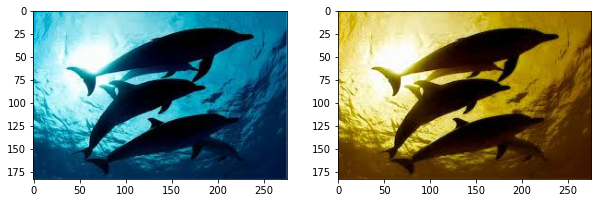

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage

fig = plt.figure(figsize=(10,10))

dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

img = cv2.imread(dolphin_img_list[0]) # 이미지를 BGR로 읽음
plt.subplot(1,2,1)
#cv2.imshow(img) # 방법 1 -> 에러 남
plt.imshow(img[:,:,::-1]) # 방법 2 -> RGB로 읽어야 해서 바뀜.
PILImage.open(dolphin_img_list[0]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음

plt.subplot(1,2,2)
plt.imshow(img)